In [1]:
import warnings
import itertools
import numpy as np
               
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import seaborn as sns

In [2]:
PROJECT=

BUCKET=
REGION='us-east1'

In [3]:
import pandas as pd
from google.cloud import bigquery
bq = bigquery.Client(project=PROJECT)

query = """

select * from (
    select *except (diff, max_date),
        diff as sales_lag_1,
        lag(diff) over (partition by store_name, item_description order by date) sales_lag_2,
        lag(diff,2) over (partition by store_name, item_description order by date) sales_lag_3,
        lag(diff,3) over (partition by store_name, item_description order by date) sales_lag_4,
        lag(diff,4) over (partition by store_name, item_description order by date) sales_lag_5,
        lag(diff,5) over (partition by store_name, item_description order by date) sales_lag_6,
        lag(diff,6) over (partition by store_name, item_description order by date) sales_lag_7,
        lag(diff,7) over (partition by store_name, item_description order by date) sales_lag_8,
        lag(diff,8) over (partition by store_name, item_description order by date) sales_lag_9,
        lag(diff,9) over (partition by store_name, item_description order by date) sales_lag_10,
        lag(diff,10) over (partition by store_name, item_description order by date) sales_lag_11,
        lag(diff,11) over (partition by store_name, item_description order by date) sales_lag_12
    from (
        select 
            *,
            round(lag(sales) over (partition by store_name, item_description order by date),2) diff,
            max(date) over (partition by store_name, item_description) max_date
        from ( 
    SELECT 
        date_trunc(date, month) date,
        upper(store_name) store_name,
        upper(item_description) item_description,
        upper(category_name) category_name,
        upper(city) city,
        upper(county) county,
        store_location,
        sum(bottles_sold) sales,
        sum(sale_dollars) sale_dollars
    FROM `bigquery-public-data.iowa_liquor_sales.sales` 
    group by 1,2,3,4,5,6,7
    order by 3,2,1
        )
    )where max_date = "2021-10-01"
)

"""

data = bq.query(query, location='US').to_dataframe()

In [4]:
data.shape

(3359005, 21)

In [5]:
data.dropna(inplace=True)
#data = data.fillna(0)
data = data.reset_index(drop=True)
data.shape

(1978716, 21)

In [6]:
data['store_name'].value_counts()

HY-VEE FOOD STORE / CEDAR FALLS               19877
HY-VEE #3 / BDI / DES MOINES                  19627
CENTRAL CITY 2                                19353
HY-VEE WINE AND SPIRITS / BETTENDORF          17100
CENTRAL CITY LIQUOR, INC.                     15495
                                              ...  
CASEY'S GENERAL STORE #1496 / RED OAK             1
CASEY'S GENERAL STORE #1315 / ARNOLDS PARK        1
CASEY'S GENERAL STORE #1676 / CARLISLE            1
CASEY'S GENERAL STORE # 3523/ ELDRIDGE            1
HY-VEE C-STORE - DOUGLAS                          1
Name: store_name, Length: 1444, dtype: int64

In [7]:
data['date'] = pd.to_datetime(data['date'])

<AxesSubplot:xlabel='sales', ylabel='Density'>

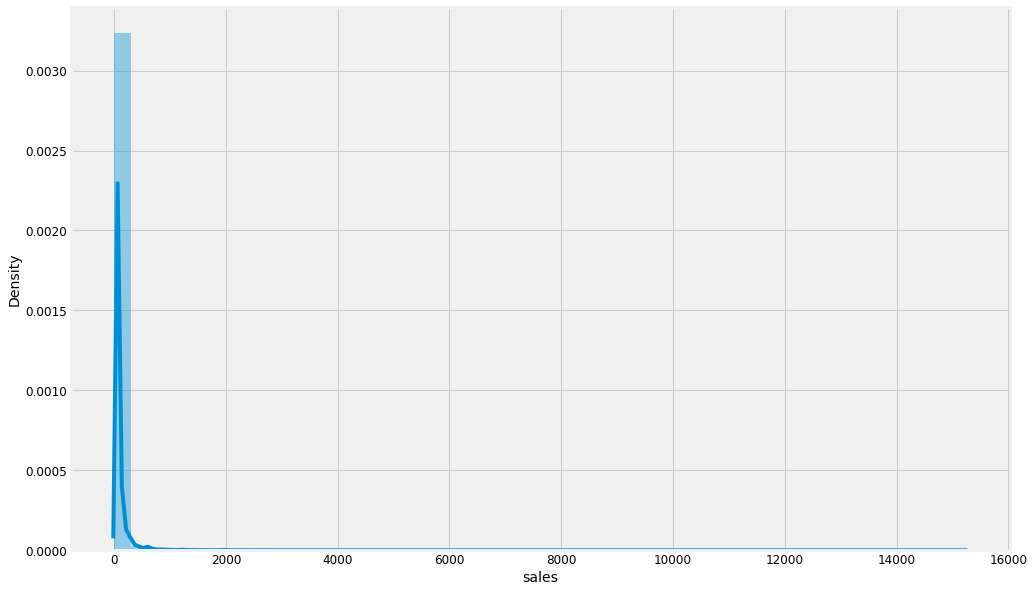

In [8]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['sales'])

In [9]:
data['log_sales'] = np.log(data['sales'])

<AxesSubplot:xlabel='log_sales', ylabel='Density'>

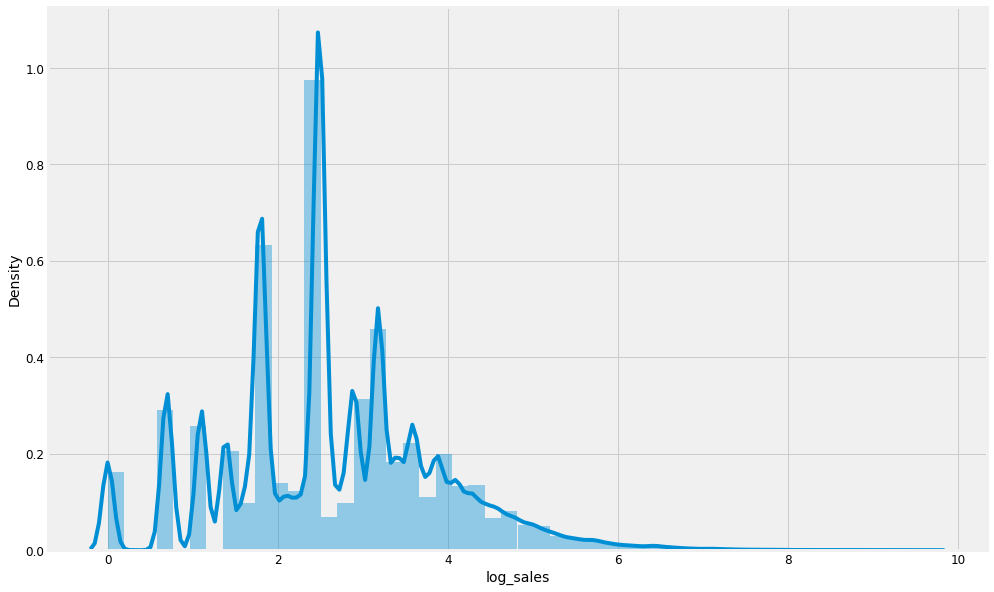

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['log_sales'])

In [ ]:
# dummies = pd.get_dummies(data['store_name'], drop_first=True)
# df = pd.concat([data, dummies], axis=1)
# df.drop(columns=['store_name'], inplace=True)

In [ ]:
#df.head()

In [12]:
data.head()

,date,store_name,item_description,category_name,city,county,store_location,sales,sale_dollars,sales_lag_1,...,sales_lag_4,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_8,sales_lag_9,sales_lag_10,sales_lag_11,sales_lag_12,log_sales
0,2021-10-01,1ST STOP BEVERAGE SHOP,99 GRAPES,AMERICAN CORDIALS & LIQUEUR,DES MOINES,POLK,POINT (-93.561517 41.600476),144,205.92,48.0,...,48.0,48.0,96.0,48.0,48.0,48.0,96.0,48.0,48.0,4.969813
1,2020-06-01,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,AMERICAN SCHNAPPS,DES MOINES,POLK,POINT (-93.561517 41.600476),50,450.00,10.0,...,10.0,20.0,10.0,10.0,10.0,10.0,10.0,20.0,10.0,3.912023
2,2021-01-01,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,AMERICAN SCHNAPPS,DES MOINES,POLK,POINT (-93.561517 41.600476),10,77.40,50.0,...,10.0,10.0,20.0,10.0,10.0,10.0,10.0,10.0,20.0,2.302585
3,2021-03-01,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,AMERICAN SCHNAPPS,DES MOINES,POLK,POINT (-93.561517 41.600476),10,77.40,10.0,...,10.0,10.0,10.0,20.0,10.0,10.0,10.0,10.0,10.0,2.302585
4,2021-05-01,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,AMERICAN SCHNAPPS,DES MOINES,POLK,POINT (-93.561517 41.600476),10,77.40,10.0,...,10.0,10.0,10.0,10.0,20.0,10.0,10.0,10.0,10.0,2.302585


In [14]:
df = data.drop(columns=['category_name', 'city', 'county', 'store_location', 'sale_dollars'])

In [16]:
df_show = df.drop(columns=['sales', 'date'])
df_show.head(10)

,store_name,item_description,sales_lag_1,sales_lag_2,sales_lag_3,sales_lag_4,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_8,sales_lag_9,sales_lag_10,sales_lag_11,sales_lag_12,log_sales
0,1ST STOP BEVERAGE SHOP,99 GRAPES,48.0,48.0,96.0,48.0,48.0,96.0,48.0,48.0,48.0,96.0,48.0,48.0,4.969813
1,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,10.0,10.0,10.0,10.0,20.0,10.0,10.0,10.0,10.0,10.0,20.0,10.0,3.912023
2,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,50.0,10.0,10.0,10.0,10.0,20.0,10.0,10.0,10.0,10.0,10.0,20.0,2.302585
3,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,10.0,50.0,10.0,10.0,10.0,10.0,20.0,10.0,10.0,10.0,10.0,10.0,2.302585
4,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,10.0,10.0,50.0,10.0,10.0,10.0,10.0,20.0,10.0,10.0,10.0,10.0,2.302585
5,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,10.0,10.0,10.0,50.0,10.0,10.0,10.0,10.0,20.0,10.0,10.0,10.0,2.302585
6,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,10.0,20.0,10.0,10.0,2.302585
7,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,10.0,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,10.0,20.0,10.0,2.302585
8,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,10.0,10.0,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,10.0,20.0,2.302585
9,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,10.0,10.0,10.0,10.0,10.0,10.0,10.0,50.0,10.0,10.0,10.0,10.0,2.302585


In [18]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
df[["store_name","item_description"]] = enc.fit_transform(df[["store_name","item_description"]])

In [19]:
df.shape

(1978716, 17)

In [20]:
variables = df.drop(columns=['sales', 'date', 'log_sales'])

X = variables.values#.reshape(-1,1)
y = df['log_sales'].values#.reshape(-1,1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
from xgboost.sklearn import XGBRegressor

regressor = XGBRegressor(n_estimators=100,learning_rate=0.2,objective='reg:squarederror')
regressor.fit(X_train, y_train) #training the algorithm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [23]:
y_pred = regressor.predict(X_test)

In [24]:
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

In [25]:
final_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

final_df.head()

,Actual,Predicted
0,30.0,10.862986
1,16.0,27.499189
2,12.0,25.011507
3,3.0,2.827605
4,4.0,1.688123


In [26]:
export = final_df.reset_index()
export.head()

,index,Actual,Predicted
0,0,30.0,10.862986
1,1,16.0,27.499189
2,2,12.0,25.011507
3,3,3.0,2.827605
4,4,4.0,1.688123


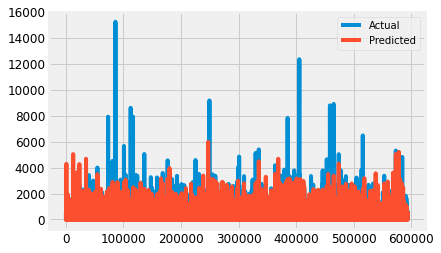

In [29]:
plt.plot(final_df['Actual'], label='Actual')
plt.plot(final_df['Predicted'], label='Predicted')
plt.legend()
plt.show()

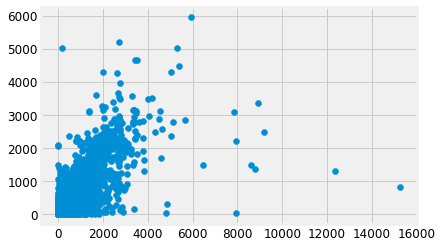

In [30]:
plt.scatter(final_df['Actual'], final_df['Predicted'])

In [32]:
from sklearn import metrics

meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R squared: {:.2f}'.format(regressor.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 74.32
Mean Absolute Error: 14.337346328233327
Mean Square Error: 3885.545717293565
Root Mean Square Error: 62.33414567709711


Rerun Full Dataset

In [33]:
y_pred = regressor.predict(X)

In [34]:
y_pred = np.exp(y_pred)

In [35]:
final_df = pd.DataFrame({'Predicted': y_pred.flatten()})

final_df.shape

(1978716, 1)

In [36]:
data['predicted'] = final_df

In [38]:
data.head()

,date,store_name,item_description,category_name,city,county,store_location,sales,sale_dollars,sales_lag_1,...,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_8,sales_lag_9,sales_lag_10,sales_lag_11,sales_lag_12,log_sales,predicted
0,2021-10-01,1ST STOP BEVERAGE SHOP,99 GRAPES,AMERICAN CORDIALS & LIQUEUR,DES MOINES,POLK,POINT (-93.561517 41.600476),144,205.92,48.0,...,48.0,96.0,48.0,48.0,48.0,96.0,48.0,48.0,4.969813,50.983269
1,2020-06-01,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,AMERICAN SCHNAPPS,DES MOINES,POLK,POINT (-93.561517 41.600476),50,450.00,10.0,...,20.0,10.0,10.0,10.0,10.0,10.0,20.0,10.0,3.912023,10.288389
2,2021-01-01,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,AMERICAN SCHNAPPS,DES MOINES,POLK,POINT (-93.561517 41.600476),10,77.40,50.0,...,10.0,20.0,10.0,10.0,10.0,10.0,10.0,20.0,2.302585,12.491185
3,2021-03-01,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,AMERICAN SCHNAPPS,DES MOINES,POLK,POINT (-93.561517 41.600476),10,77.40,10.0,...,10.0,10.0,20.0,10.0,10.0,10.0,10.0,10.0,2.302585,11.213427
4,2021-05-01,1ST STOP BEVERAGE SHOP,99 ROOT BEER MINI,AMERICAN SCHNAPPS,DES MOINES,POLK,POINT (-93.561517 41.600476),10,77.40,10.0,...,10.0,10.0,10.0,20.0,10.0,10.0,10.0,10.0,2.302585,11.339116


In [39]:
final_df.head()

,Predicted
0,50.983269
1,10.288389
2,12.491185
3,11.213427
4,11.339116


In [40]:
final_df.to_csv('Forecast_11_22.csv')